In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from upsetplot import UpSet, from_contents
import seaborn as sns
import numpy as np

In [2]:
# Import miRNAs from each of the classification categories
ctl_s1 = pd.read_csv('./ctl_s1/50_ctl_s1.csv')
s1_s2 = pd.read_csv('./s1_s2/50_s1_s2.csv')
s2_s3 = pd.read_csv('./s2_s3/50_s2_s3.csv')
s3_s4 = pd.read_csv('./s3_s4/50_s3_s4.csv')

In [3]:
print(f'ctl_s1 shape: {ctl_s1.shape}')
print(f's1_s2 shape: {s1_s2.shape}')
print(f's2_s3 shape: {s2_s3.shape}')
print(f's3_s4 shape: {s3_s4.shape}\n')

print(f'ctl_s1 columns: {ctl_s1.columns}')
print(f's1_s2 columns: {s1_s2.columns}')
print(f's2_s3 columns: {s2_s3.columns}')
print(f's3_s4 columns: {s3_s4.columns}')

ctl_s1 shape: (83, 3)
s1_s2 shape: (29, 3)
s2_s3 shape: (56, 3)
s3_s4 shape: (52, 3)

ctl_s1 columns: Index(['Feature', 'Importance', 'Classifier'], dtype='object')
s1_s2 columns: Index(['Feature', 'Importance', 'Classifier'], dtype='object')
s2_s3 columns: Index(['Feature', 'Importance', 'Classifier'], dtype='object')
s3_s4 columns: Index(['Feature', 'Importance', 'Classifier'], dtype='object')


In [4]:
ctl_s1_set = set(ctl_s1['Feature'])
s1_s2_set = set(s1_s2['Feature'])
s2_s3_set = set(s2_s3['Feature'])
s3_s4_set = set(s3_s4['Feature'])

print(f'ctl_s1 miRNAs: {ctl_s1_set}')
print(f's1_s2 miRNAs: {s1_s2_set}')
print(f's2_s3 miRNAs: {s2_s3_set}')
print(f's3_s4 miRNAs: {s3_s4_set}')

ctl_s1 miRNAs: {'hsa-miR-8059', 'hsa-miR-4525', 'hsa-miR-4783-3p', 'hsa-miR-3940-5p', 'hsa-miR-642b-3p', 'hsa-miR-4706', 'hsa-miR-197-5p', 'hsa-miR-1233-5p', 'hsa-miR-575', 'hsa-miR-320a', 'hsa-miR-4687-5p', 'hsa-miR-1228-5p', 'hsa-miR-887-3p', 'hsa-miR-1203', 'hsa-miR-4648', 'hsa-miR-1307-3p', 'hsa-miR-6805-5p', 'hsa-miR-6784-5p', 'hsa-miR-4532', 'hsa-miR-1238-5p', 'hsa-miR-1469', 'hsa-miR-4276', 'hsa-miR-6766-5p', 'hsa-miR-6802-5p', 'hsa-miR-6756-5p', 'hsa-miR-6746-5p', 'hsa-miR-6090', 'hsa-miR-4728-5p', 'hsa-miR-4675', 'hsa-miR-92b-5p', 'hsa-miR-4787-5p', 'hsa-miR-4730', 'hsa-miR-6131', 'hsa-miR-4732-5p', 'hsa-miR-6787-5p', 'hsa-miR-663a', 'hsa-miR-8073', 'hsa-miR-3184-5p', 'hsa-miR-4690-5p', 'hsa-miR-4758-5p', 'hsa-miR-1343-3p', 'hsa-miR-6800-5p'}
s1_s2 miRNAs: {'hsa-miR-6769b-5p', 'hsa-miR-3155b', 'hsa-miR-4439', 'hsa-miR-3178', 'hsa-miR-4749-5p', 'hsa-miR-6869-3p', 'hsa-miR-937-5p', 'hsa-miR-6857-3p', 'hsa-miR-4647', 'hsa-miR-6895-3p', 'hsa-miR-7846-3p', 'hsa-miR-4462', 'hsa-miR-

In [5]:
# Print the size of each set
print(f'ctl_s1 size: {len(ctl_s1_set)}')
print(f's1_s2 size: {len(s1_s2_set)}')
print(f's2_s3 size: {len(s2_s3_set)}')
print(f's3_s4 size: {len(s3_s4_set)}')

ctl_s1 size: 42
s1_s2 size: 15
s2_s3 size: 28
s3_s4 size: 26


#### UpSet Plot for Visualization

/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


 

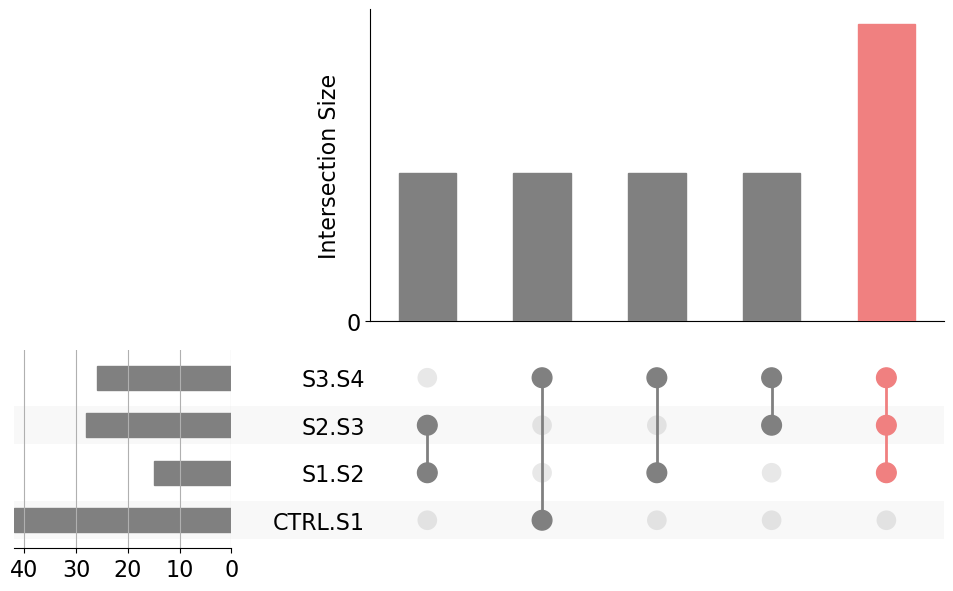

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from upsetplot import UpSet, from_contents

# Define contents for the UpSet plot in the desired order
contents = {
    'CTRL.S1': ctl_s1_set,
    'S1.S2': s1_s2_set,
    'S2.S3': s2_s3_set,
    'S3.S4': s3_s4_set
}

# Convert the dictionary of sets to a format suitable for UpSet plot
upset_data = from_contents(contents)

# Create UpSet plot with the specified order
upset = UpSet(
    upset_data, 
    subset_size='count', 
    show_counts=False, 
    sort_by='degree',  # Ensure subsets are sorted by degree to show all combinations
    sort_categories_by=None,  # Ensure categories are not auto-sorted
    facecolor="gray",
    element_size=None,  # Adjust element size to reduce white space    
    min_subset_size=0,  # Ensure all subsets are shown
    max_subset_size=4,
)

# Customize and style the subsets
upset.style_subsets(
    present=['CTRL.S1', 'S1.S2'],
    facecolor="gray",
    edgecolor="black"
)
upset.style_subsets(
    present=['S1.S2', 'S2.S3'],
    facecolor="gray",
)
upset.style_subsets(
    present=['S1.S2', 'S2.S3', 'S3.S4'],
    facecolor="lightcoral",
)

# Plot UpSet plot with custom figure size and reduced white space
fig = plt.figure(figsize=(12, 7))
upset.plot(fig=fig)

# Increase font size for all text elements
plt.xlabel('Intersection size', fontsize=16)
plt.ylabel('Intersection Size', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Modify y-axis ticks to remove bar on the 1 y-tick and add a bar for the x-axis
plt.gca().set_yticks([0])
plt.gca().spines['bottom'].set_visible(True)

# Increase font size for the bottom part of the UpSet plot
for text in fig.findobj(plt.Text):
    text.set_fontsize(16)

plt.show()

In [ ]:
small_intersections = [
    ('CTRL_S1', 'S3_S4'),
    ('CTRL_S1', 'S2_S3'),
    ('S1_S2', 'S3_S4'),
    ('S1_S2', 'S2_S3', 'S3_S4'),
    ('CTRL_S1', 'S1_S2', 'S3_S4'),
    ('CTRL_S1', 'S1_S2', 'S2_S3', 'S3_S4')
]

for intersection in small_intersections:
    miRNAs = set.intersection(*[contents[stage] for stage in intersection])
    print(f"miRNAs in intersection {intersection}: {miRNAs}")

miRNAs in intersection ('CTRL_S1', 'S3_S4'): {'hsa-miR-6756-5p'}
miRNAs in intersection ('CTRL_S1', 'S2_S3'): set()
miRNAs in intersection ('S1_S2', 'S3_S4'): {'hsa-miR-6769b-5p', 'hsa-miR-548h-5p', 'hsa-miR-139-3p'}
miRNAs in intersection ('S1_S2', 'S2_S3', 'S3_S4'): {'hsa-miR-6769b-5p', 'hsa-miR-548h-5p'}
miRNAs in intersection ('CTRL_S1', 'S1_S2', 'S3_S4'): set()
miRNAs in intersection ('CTRL_S1', 'S1_S2', 'S2_S3', 'S3_S4'): set()
